# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests, json
import time
from scipy.stats import linregress

# Import API key
#from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

632

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
raw_data = pd.DataFrame(columns =("City","Latitude","Max Temp","Wind Speed","Cloudiness","Description", "Humidity"))

In [4]:
# Enter your API key here
api_key = "b9eda530467618ee7b488b14c39de25c"
  
# base_url variable to store url
base_url = "http://api.openweathermap.org/data/2.5/weather?"

#loop
for city_name in cities:
  
    # complete_url variable to store
    # complete url address
    complete_url = base_url + "appid=" + api_key + "&q=" + city_name
  
    # get method of requests module
    # return response object
    response = requests.get(complete_url)
  
    # json method of response object 
    # convert json format data into
    # python format data
    x = response.json()
  
    # Now x contains list of nested dictionaries
    # Check the value of "cod" key is equal to
    # "404", means city is found otherwise,
    # city is not found
    if x["cod"] != "404":
  
        # store the value of "main"
        # key in variable y
        y = x["main"]
        y1 = x["wind"]
        y2 = x["clouds"]
        y3 = x["coord"]
  
        # store the value corresponding
        # to the "temp" key of y
        current_temperature = y["temp_max"]
  
        # store the value corresponding
        # to the "clouds" key of y
        current_clouds = y2["all"]
      
        # store the value corresponding
        # to the "humidity" key of y
        current_humidity = y["humidity"]
    
         # store the value corresponding
        # to the "wind" key of y
        current_wind = y1["speed"]
  
        # store the value of "weather"
        # key in variable z
        z = x["weather"]
        
        lat = y3["lat"]
  
        # store the value corresponding 
        # to the "description" key at 
        # the 0th index of z
        weather_description = z[0]["description"]
  
        # print following values
        print(current_temperature, current_clouds, current_humidity, current_wind, weather_description, city_name, lat) 
        row_to_add = {'City':city_name,'Latitude':lat,'Max Temp':current_temperature,'Cloudiness':current_clouds,'Wind Speed':current_wind,'Description':weather_description,'Humidity':current_humidity}
        raw_data = raw_data.append(row_to_add, ignore_index = True)
   
        
    else:
        print(" City Not Found ")

303.15 20 79 9.77 few clouds puerto ayora -0.7393
268.96 86 83 5.96 overcast clouds khatanga 71.9667
300.15 20 94 1.03 few clouds georgetown 5.4112
 City Not Found 
299.26 75 69 6.17 broken clouds kapaa 22.0752
270.54 24 85 0.92 few clouds qaanaaq 77.484
299.15 75 83 7.2 broken clouds isangel -19.55
289.26 90 100 6.17 overcast clouds jamestown 42.097
281.48 0 70 1.54 clear sky titel 45.2061
287.19 100 68 1.26 overcast clouds hanzhong 33.0728
276.15 20 70 2.06 few clouds iqaluit 63.7506
273.55 100 99 3.54 overcast clouds zhigansk 66.7697
299.15 75 83 4.63 broken clouds saint-georges 12.0564
266.15 90 86 4.12 overcast clouds tuktoyaktuk 69.4541
303.15 20 70 5.66 few clouds west bay 19.3667
286.48 100 81 4.47 overcast clouds mataura -46.1927
266.15 90 73 2.06 light snow barrow 71.2906
289.26 99 67 0.76 overcast clouds hermanus -34.4187
292.66 89 86 2.31 overcast clouds igunga -4.2833
272.62 84 86 3.38 broken clouds upernavik 72.7868
276.82 0 27 0.46 clear sky hovd 48.0056
285.23 28 83 5.1

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   City         583 non-null    object 
 1   Latitude     583 non-null    float64
 2   Max Temp     583 non-null    float64
 3   Wind Speed   583 non-null    float64
 4   Cloudiness   583 non-null    object 
 5   Description  583 non-null    object 
 6   Humidity     583 non-null    object 
dtypes: float64(3), object(4)
memory usage: 32.0+ KB


In [6]:
raw_data['Cloudiness'] = raw_data['Cloudiness'].astype(float)
raw_data['Humidity'] = raw_data['Humidity'].astype(float)
raw_data

,City,Latitude,Max Temp,Wind Speed,Cloudiness,Description,Humidity
0,puerto ayora,-0.7393,303.15,9.77,20.0,few clouds,79.0
1,khatanga,71.9667,268.96,5.96,86.0,overcast clouds,83.0
2,georgetown,5.4112,300.15,1.03,20.0,few clouds,94.0
3,kapaa,22.0752,299.26,6.17,75.0,broken clouds,69.0
4,qaanaaq,77.4840,270.54,0.92,24.0,few clouds,85.0
...,...,...,...,...,...,...,...
578,nova russas,-4.7067,297.33,1.64,100.0,light rain,83.0
579,port-cartier,50.0334,280.93,8.23,75.0,broken clouds,45.0
580,obera,-27.4871,294.82,1.42,8.0,clear sky,62.0
581,hidalgo,20.5000,302.58,2.03,0.0,clear sky,10.0


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [7]:
clean_city_high_humidity = raw_data[raw_data['Humidity'] > 100.0]
len(clean_city_high_humidity)

0

In [8]:
#  Get the indices of cities that have humidity over 100%.
# 
#  This step seems unnecessary, even if there is high humidity data, as we can remove those
#  entries in a much simpler way

In [9]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_data = raw_data[raw_data['Humidity'] <= 100.0]

In [10]:
# Export the clean city data here:

clean_city_data.to_csv(r'./clean_city_data.csv')


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

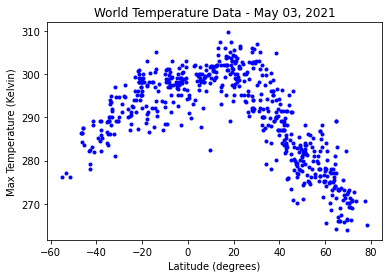

In [11]:
from datetime import date

today = date.today()
d2 = today.strftime("%B %d, %Y")

plt.plot(clean_city_data['Latitude'],clean_city_data['Max Temp'],'b.')
plt.xlabel('Latitude (degrees)')
plt.ylabel('Max Temperature (Kelvin)')
plt.title('World Temperature Data - %s' % d2)
plt.savefig('World_Temperature.png')
plt.show()

## Latitude vs. Humidity Plot

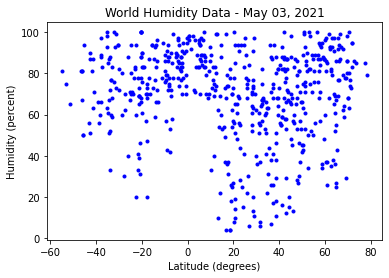

In [12]:
plt.plot(clean_city_data['Latitude'],clean_city_data['Humidity'],'b.')
plt.xlabel('Latitude (degrees)')
plt.ylabel('Humidity (percent)')
plt.title('World Humidity Data - %s' % d2)
plt.savefig('World_Humidity.png')
plt.show()

## Latitude vs. Cloudiness Plot

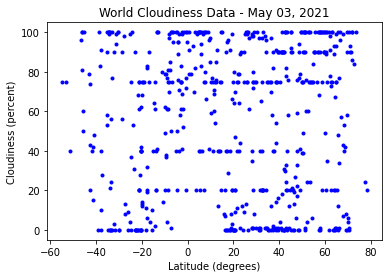

In [13]:
plt.plot(clean_city_data['Latitude'],clean_city_data['Cloudiness'],'b.')
plt.xlabel('Latitude (degrees)')
plt.ylabel('Cloudiness (percent)')
plt.title('World Cloudiness Data - %s' % d2)
plt.savefig('World_Cloudiness.png')
plt.show()

## Latitude vs. Wind Speed Plot

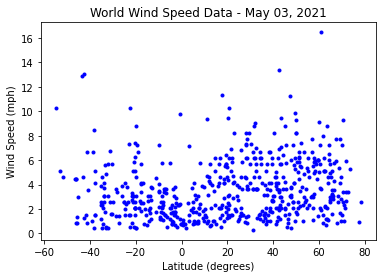

In [14]:
plt.plot(clean_city_data['Latitude'],clean_city_data['Wind Speed'],'b.')
plt.xlabel('Latitude (degrees)')
plt.ylabel('Wind Speed (mph)')
plt.title('World Wind Speed Data - %s' % d2)
plt.savefig('World_WindSpeed.png')
plt.show()

## Linear Regression

In [15]:
def linear_plot(x,y,xstring,ystring,thistitle):
    res = linregress(x, y)
    
    from datetime import date

    today = date.today()
    d2 = today.strftime("%B %d, %Y")

    plt.plot(x,y,'b.',label='Data')
    plt.plot(x, res.intercept + res.slope*x, 'r-', label='Linear Fit')
    plt.xlabel(xstring)
    plt.ylabel(ystring)
    plt.title(thistitle % d2)
    plt.legend()
    plt.show()

    from scipy.stats import t
    tinv = lambda p, dof: abs(t.ppf(p/2, dof))
    ts = tinv(0.05, len(x)-2)
    print(f"R-squared: {res.rvalue**2:.6f}")
    print(f"slope (95%): {res.slope:.6f} +/- {ts*res.stderr:.6f}")

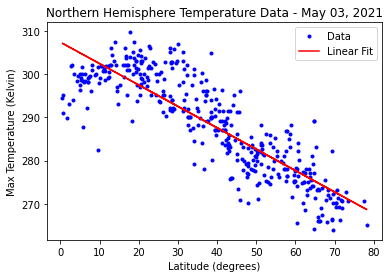

R-squared: 0.743480
slope (95%): -0.495687 +/- 0.028802


In [16]:
clean_city_north = clean_city_data[clean_city_data['Latitude']>0.0]

linear_plot(clean_city_north['Latitude'],clean_city_north['Max Temp'],'Latitude (degrees)','Max Temperature (Kelvin)','Northern Hemisphere Temperature Data - %s')

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

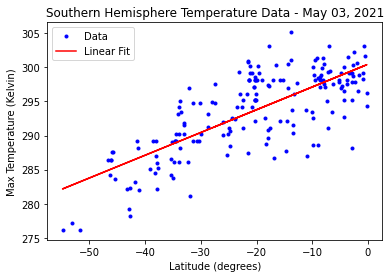

R-squared: 0.566843
slope (95%): 0.333894 +/- 0.042453


In [17]:
clean_city_south = clean_city_data[clean_city_data['Latitude']<0.0]

linear_plot(clean_city_south['Latitude'],clean_city_south['Max Temp'],'Latitude (degrees)','Max Temperature (Kelvin)','Southern Hemisphere Temperature Data - %s')

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

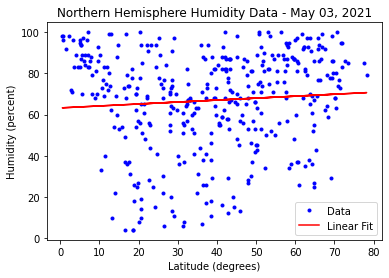

R-squared: 0.006038
slope (95%): 0.094881 +/- 0.120420


In [18]:
linear_plot(clean_city_north['Latitude'],clean_city_north['Humidity'],'Latitude (degrees)','Humidity (percent)','Northern Hemisphere Humidity Data - %s')

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

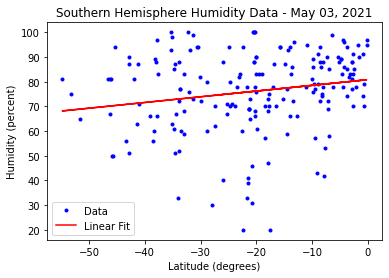

R-squared: 0.035549
slope (95%): 0.230901 +/- 0.174927


In [19]:
linear_plot(clean_city_south['Latitude'],clean_city_south['Humidity'],'Latitude (degrees)','Humidity (percent)','Southern Hemisphere Humidity Data - %s')

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

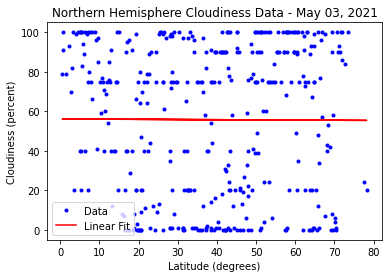

R-squared: 0.000023
slope (95%): -0.009203 +/- 0.190071


In [20]:
linear_plot(clean_city_north['Latitude'],clean_city_north['Cloudiness'],'Latitude (degrees)','Cloudiness (percent)','Northern Hemisphere Cloudiness Data - %s')

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

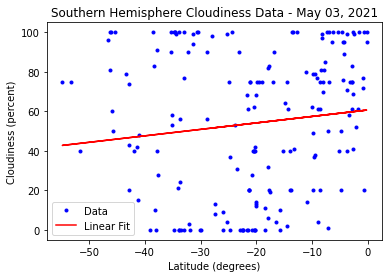

R-squared: 0.015106
slope (95%): 0.327104 +/- 0.384157


In [21]:
linear_plot(clean_city_south['Latitude'],clean_city_south['Cloudiness'],'Latitude (degrees)','Cloudiness (percent)','Southern Hemisphere Cloudiness Data - %s')

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

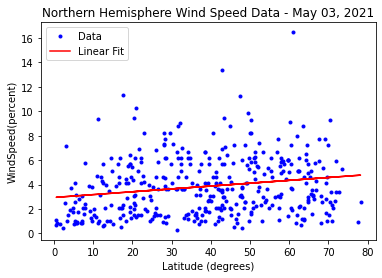

R-squared: 0.036299
slope (95%): 0.023320 +/- 0.011886


In [22]:
linear_plot(clean_city_north['Latitude'],clean_city_north['Wind Speed'],'Latitude (degrees)','WindSpeed(percent)','Northern Hemisphere Wind Speed Data - %s')

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

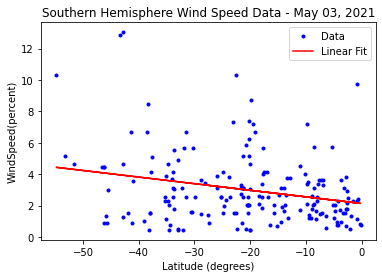

R-squared: 0.064814
slope (95%): -0.042036 +/- 0.023224


In [23]:
linear_plot(clean_city_south['Latitude'],clean_city_south['Wind Speed'],'Latitude (degrees)','WindSpeed(percent)','Southern Hemisphere Wind Speed Data - %s')

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

In [24]:
# Now, let's do the fit of temperature vs. latitude correctly!!! 

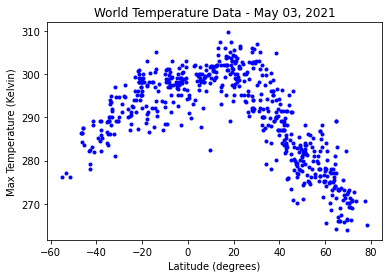

In [25]:
plt.plot(clean_city_data['Latitude'],clean_city_data['Max Temp'],'b.')
plt.xlabel('Latitude (degrees)')
plt.ylabel('Max Temperature (Kelvin)')
plt.title('World Temperature Data - %s' % d2)
plt.savefig('World_Temperature.png')
plt.show()

Coefficients (from curve_fit)
[ 34.72077972   3.82980354 300.88165923]
Covariance Matrix (from curve_fit)
[[0.69843038 0.16129371 0.19054633]
 [0.16129371 0.25150832 0.00707444]
 [0.19054633 0.00707444 0.09842103]]

Final Result: y = (300.88 +/- 0.31)  - (34.72 +/- 0.84)*sin^2(Pi/180(x - (3.83 +/- 0.50)) 
R-squared: 0.777448


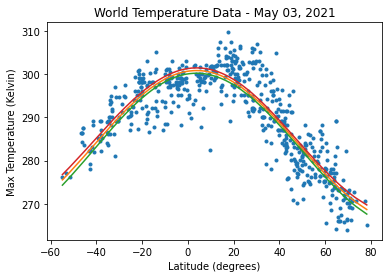

In [42]:
from scipy.optimize import curve_fit

def fitfunction(x,*paramlist):
    return paramlist[2]-paramlist[0]*(np.sin(np.pi/180.0*(x-paramlist[1])))**2
    #return paramlist[0]*np.cos(np.pi/180.0*(x-paramlist[1]))+paramlist[2]

init_vals = [35.0,3.0,300.0]

clean_city_data = clean_city_data.sort_values(by=['Latitude'])

xi = clean_city_data['Latitude']
yi = clean_city_data['Max Temp']

popt, pcov = curve_fit(fitfunction,xi,yi,p0=init_vals)
perr = np.sqrt(np.diag(pcov))

ps = np.random.multivariate_normal(popt,pcov,10000)
ysample=np.asarray([fitfunction(xi,*pi) for pi in ps])

lower = np.percentile(ysample,2.5,axis=0)
upper = np.percentile(ysample,97.5,axis=0)
middle = (lower+upper)/2.0

print("Coefficients (from curve_fit)")
print (popt)
print("Covariance Matrix (from curve_fit)")
print (pcov)

print()
print ("Final Result: y = (%0.2f +/- %0.2f)  - (%0.2f +/- %0.2f)*sin^2(Pi/180(x - (%0.2f +/- %0.2f)) " % (popt[2],perr[2],popt[0],perr[0],popt[1],perr[1]))
#print ("Final Result: y = (%0.2f +/- %0.2f) x cos(Pi/180(x - (%0.2f +/- %0.2f)) + (%0.2f +/- %0.2f)" % (popt[0],perr[0],popt[1],perr[1],popt[2],perr[2]))

residuals = yi - fitfunction(xi, *popt)
ss_res = np.sum(residuals**2)
ss_tot = np.sum((yi-np.mean(yi))**2)
r_squared = 1 - (ss_res / ss_tot)

print(f"R-squared: {r_squared:.6f}")

plt.plot(xi,yi,'.')

plt.plot(xi,middle)
plt.plot(xi,lower)
plt.plot(xi,upper)
plt.xlabel('Latitude (degrees)')
plt.ylabel('Max Temperature (Kelvin)')
plt.title('World Temperature Data - %s' % d2)
plt.show()

In [27]:
# What might we expect?
#
# The earth's rotational axis is perpendicular to the earth-sun axis on the spring and fall equinoxes 
# (March 21 and September 21).  On these dates the sun is directly over the equator.  
# The rotational axis is parallel to the earth-sun axes on the summer and winter solstaces 
# (June 21 and December 21).  On these dates, the sun is directly over the Tropics of Cancer 
# and Capricorn, respectively.  The tilt of the earth's axis is 23.5 degrees.  Today is May 3rd.  
# It has been 43 days since the spring equinox.  Therefore, the sun is directly over the latitude 
# corresponding to:  (43/(0.25*365))*23.5 = 11.1 degrees.